In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM

In [2]:
df = pd.read_csv("../rastro_1min.tar.gz", index_col=0)
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,514,102539,19.737289,17.590780,27203112,3707.610350,4828.865308,3542,163,73861,3.443046,4.184972,8863072.0,434.507309,616.176033,10628.0,9784.0
2016-06-29 22:57:00,634,58511,16.470517,15.334160,7034656,2017.145780,2984.791050,3120,73,84479,3.385373,3.600891,8968600.0,373.483436,468.323626,14496.0,11233.0
2016-06-29 22:58:00,889,121123,16.866703,14.328054,22695704,2655.061443,3775.325510,5054,159,173947,6.576329,5.829330,14363056.0,544.011478,561.241565,19482.0,6716.0
2016-06-29 22:59:00,670,105240,18.245522,15.004146,19683368,2672.386192,3300.962021,3996,177,122518,6.762097,5.491740,9711008.0,540.194010,469.583361,14376.0,3372.0
2016-06-29 23:00:00,629,651738,27.337623,13.555662,169093944,5919.297844,4132.723859,14467,1120,124437,6.628143,6.706426,11546504.0,596.334224,698.955721,13902.0,4634.0


In [3]:
df.fillna(0, inplace=True)

In [4]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,0.373818,0.044403,0.424465,0.767610,0.032437,0.133019,0.264598,0.070542,0.014701,0.038770,0.078251,0.227991,0.019428,0.043883,0.061486,0.149019,0.205572
2016-06-29 22:57:00,0.461091,0.025337,0.354210,0.669138,0.008388,0.072370,0.163552,0.062138,0.006584,0.044343,0.076940,0.196172,0.019659,0.037720,0.046732,0.203253,0.236017
2016-06-29 22:58:00,0.646545,0.052450,0.362731,0.625235,0.027062,0.095256,0.206869,0.100655,0.014340,0.091305,0.149462,0.317574,0.031484,0.054943,0.056004,0.273163,0.141110
2016-06-29 22:59:00,0.487273,0.045572,0.392383,0.654737,0.023470,0.095878,0.180876,0.079584,0.015963,0.064310,0.153684,0.299182,0.021287,0.054557,0.046858,0.201570,0.070849
2016-06-29 23:00:00,0.457455,0.282225,0.587915,0.591530,0.201626,0.212368,0.226453,0.288124,0.101010,0.065317,0.150640,0.365357,0.025310,0.060227,0.069746,0.194924,0.097365


In [5]:
#model = IsolationForest(n_estimators=500, n_jobs=-1, random_state=0, verbose=1)
#model = LocalOutlierFactor(n_neighbors=100, n_jobs=-1)
model = OneClassSVM(kernel="rbf", verbose=1)

In [6]:
preds = model.fit_predict(df)

[LibSVM]............
*
optimization finished, #iter = 12725
obj = 96335698.086764, rho = 11010.359148
nSV = 21246, nBSV = 21244


In [7]:
anomaly = pd.DataFrame({"anomaly": preds}, index=df.index)
anomaly.head()

,anomaly
overalltime,
2016-06-29 22:56:00,-1
2016-06-29 22:57:00,-1
2016-06-29 22:58:00,-1
2016-06-29 22:59:00,-1
2016-06-29 23:00:00,-1


In [8]:
print(f"anomalies = {(anomaly['anomaly']==-1).sum()} / {len(anomaly)}")

anomalies = 21246 / 42489


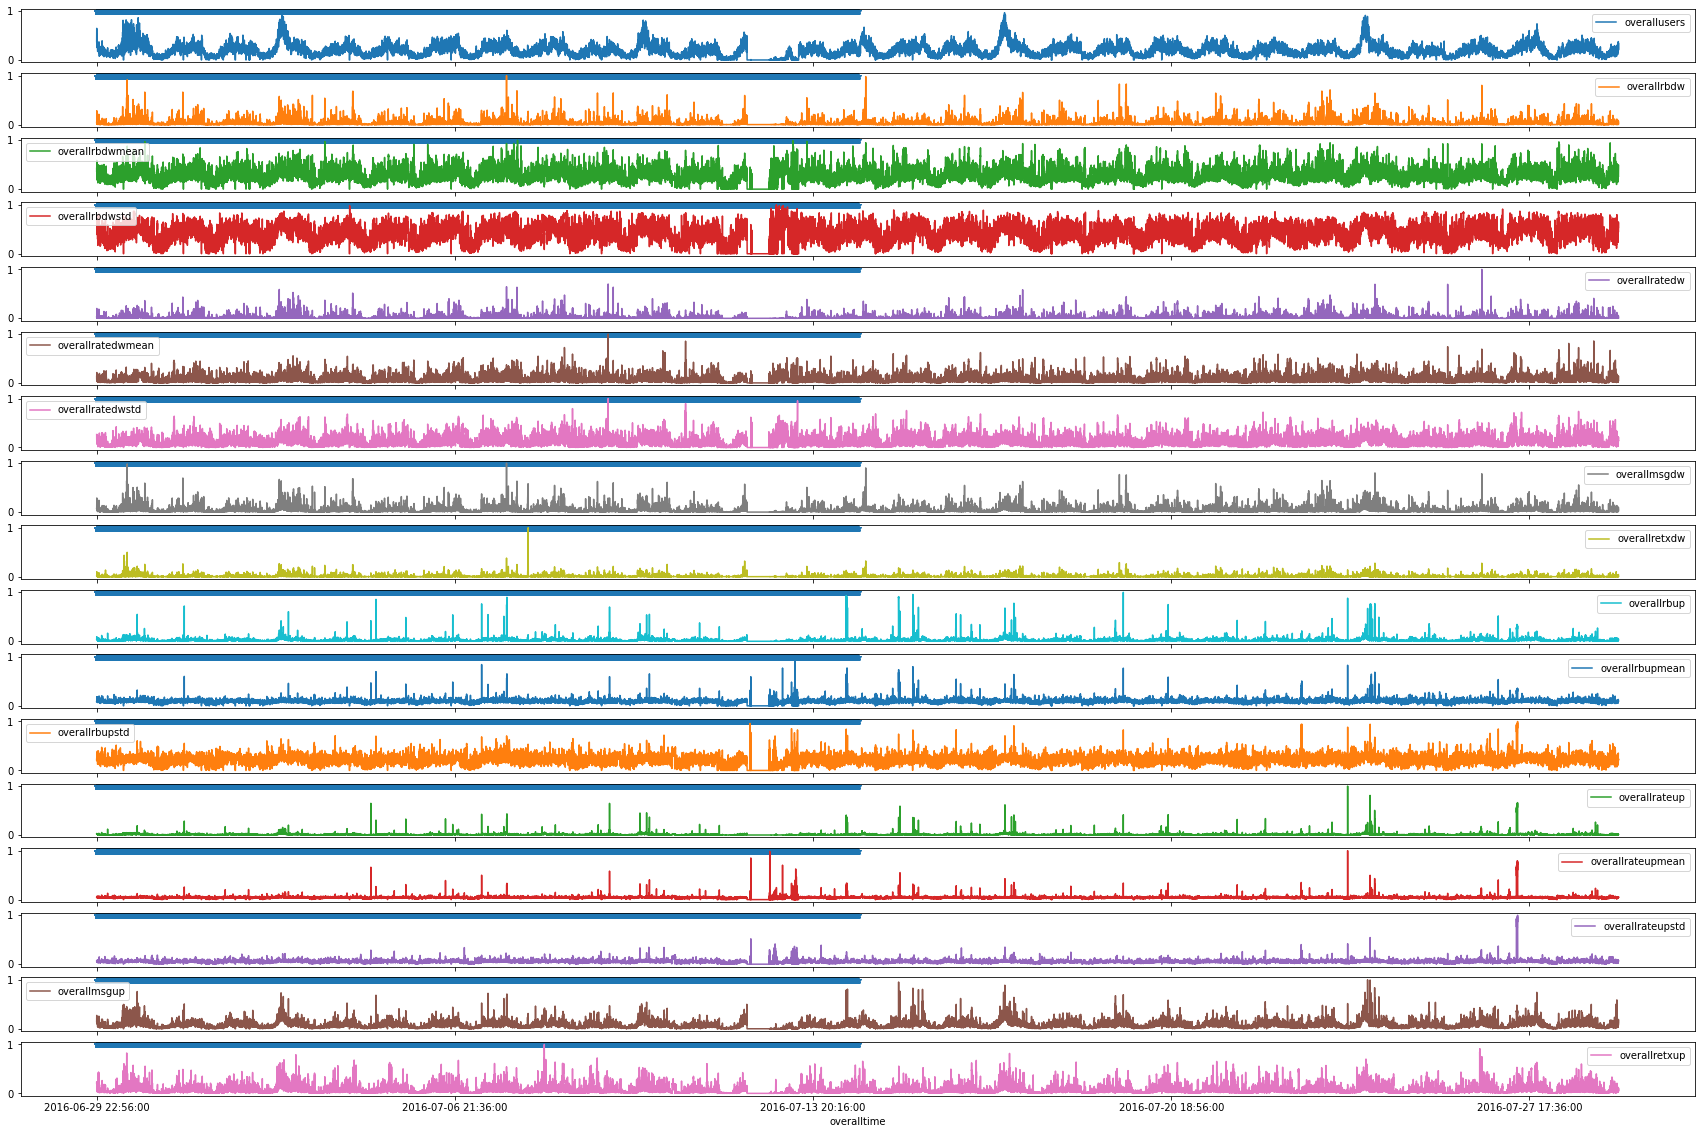

In [10]:
axs = df.plot(subplots=True, sharex=True, figsize=(30,20))
an = anomaly[anomaly["anomaly"]==-1].index
for ax in axs:
    ax.scatter(x=an, y=[1 for i in range(len(an))], marker="*")
plt.show()